<a href="https://colab.research.google.com/github/ELRHAOUAT/Deep-Learnig-en-Python/blob/main/mnist_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST en Deep Learning

Construire des algorithmes de Deep Learning (ANN et CNN) pour tenter de reconnaître des chiffres manuscrits.

## Chargement des données et transformation

Nous allons travailler sur la base de données MNIST qui contient 60000 images en niveaux de grille de résolution 28x28, représentant les 10 chiffres de 0 à 9, ainsi qu'un jeu de test de 10000 images. Tout d'abord, chargeons ce jeu de données.

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras

(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


Visualisons quelques données.   

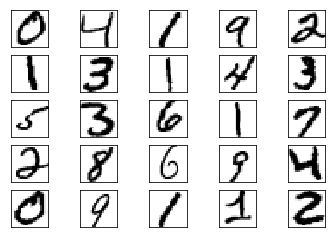

In [ ]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(5):
        for y in range(5):
            ax = fig.add_subplot(5, 5, 5*y+x+1)
            ax.matshow(images[5*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

Maintenant que nous avons chargé les données, nous allons modifier la dimension de matrices, afin de les mettre sous une forme qui pourra être traitée par nos réseaux de neurones.

In [ ]:
subset=10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train_base[:subset], nb_classes)
y_test = np_utils.to_categorical(y_test_base, nb_classes)

Nous avons maintenant des vecteurs à la place des images.

In [ ]:
print(X_train_base.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train)

(60000, 28, 28)
(10000, 784)
(10000, 10)
(10000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


## Construire un réseau de neurones ( ANN )




Nous allons créer un modèle Keras en utilisant l'api Sequential:
* __model = Sequential()__

Puis utiliser les méthodes suivantes de Keras pour ajouter des couches à ce modèle :

* __model.add(Dense(nbhiden, [input_shape=(nbinput,1)], [activation='activationfunction']))__ : ajoute une couche cachée au réseau de neurones. nbhidden est le nombre de neurones de la couche. [input_shape=(nbinput,)] correspond à la dimension de l'entrée, [activation='activationfunction'] est la fonction d'activation
* __model.add(Dropout(value))__ : applique un dropout à la couche, pour éviter le surapprentissage

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(784,),activation='sigmoid'))
model.add(Dense(12,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
    
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                9420      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


Ensuite, nous allons lancer l'apprentissage des paramètres.

In [ ]:
batch_size = 256
epochs=20
history_model_1 = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 14ms/step - loss: 2.4398 - accuracy: 0.1105 - val_loss: 2.2378 - val_accuracy: 0.3653
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 2.2227 - accuracy: 0.1784 - val_loss: 2.0148 - val_accuracy: 0.5069
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 1.9954 - accuracy: 0.2545 - val_loss: 1.6853 - val_accuracy: 0.5380
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 1.7657 - accuracy: 0.3220 - val_loss: 1.4863 - val_accuracy: 0.5306
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 1.6160 - accuracy: 0.3662 - val_loss: 1.3518 - val_accuracy: 0.5716
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 1.5105 - accuracy: 0.4142 - val_loss: 1.2485 - val_accuracy: 0.6295
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 1.4407 - accuracy: 0.4428 - val_loss: 1.1579 - val_accuracy: 0.6757
Epoch 8/20
40/40 [=

In [ ]:
history_model_1.history??

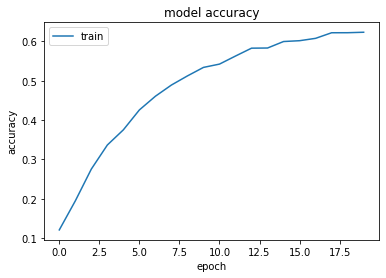

In [ ]:
plt.plot(history_model_1.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'], loc = 'upper left')

Nous analysons les résultats. Ce réseau de neurones est-il performant ?

Voyons ce que donne notre modèle sur un exemple.




In [ ]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(X_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(X_test[index].reshape((1,784)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))

NameError: ignored

## CNN : réseaux de neurones convolutionnels

Nous allons maintenant implémenter un réseau de neurones convolutionnel.

Pour cet algorithme, vous allez avoir besoin des méthodes Keras suivantes, en plus de celles déjà vues précédemment :

* __model.add(Conv2D(filters, kernel_size=(size, size), [activation='activation_function'], [input_shape=input_shape]))__ : ajoute une couche de convolution au réseau de neurones. filters est le nombre de filtres de convolution. kernel_size est la taille des filtres de convolution.
* __model.add(MaxPooling2D(pool_size=(psize, psize)))__ : ajoute une couche de max pooling. pool_size est la taille de la fenêtre de pooling.

In [ ]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)


 Visualisons quelques données.   

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


Construire un réseaux de neurones convolutionnels

In [ ]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6770      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

Ensuite, nous allons lancer l'apprentissage du CNN




In [ ]:
batch_size = 255
epochs=20
history_model_2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 3s 72ms/step - loss: 2.0861 - accuracy: 0.2281 - val_loss: 1.0746 - val_accuracy: 0.7151
Epoch 2/20
40/40 [==============================] - 3s 66ms/step - loss: 1.4439 - accuracy: 0.4610 - val_loss: 0.6831 - val_accuracy: 0.8472
Epoch 3/20
40/40 [==============================] - 3s 67ms/step - loss: 1.2542 - accuracy: 0.5360 - val_loss: 0.5771 - val_accuracy: 0.8913
Epoch 4/20
40/40 [==============================] - 3s 69ms/step - loss: 1.1414 - accuracy: 0.5794 - val_loss: 0.5467 - val_accuracy: 0.9028
Epoch 5/20
40/40 [==============================] - 3s 74ms/step - loss: 1.1011 - accuracy: 0.5966 - val_loss: 0.4715 - val_accuracy: 0.9077
Epoch 6/20
40/40 [==============================] - 3s 69ms/step - loss: 1.0424 - accuracy: 0.6118 - val_loss: 0.4475 - val_accuracy: 0.9066
Epoch 7/20
40/40 [==============================] - 3s 70ms/step - loss: 1.0327 - accuracy: 0.6228 - val_loss: 0.4082 - val_accuracy: 0.9116
Epoch 8/20
40

Voyons ce que donne notre modèle sur un exemple.

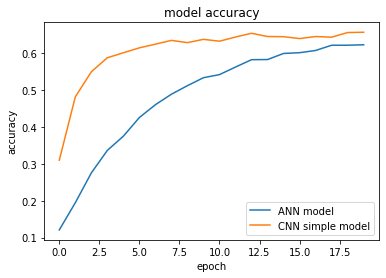

In [ ]:
plt.figure()
plt.plot(history_model_1.history['accuracy'], label = "ANN model")
plt.plot(history_model_2.history['accuracy'], label = "CNN simple model")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

The accuracy on the test set is  92.94999837875366 %


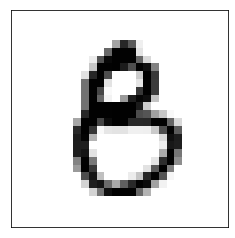

le chiffre reconnu est:  0
le chiffre à reconnaitre  est:  8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(x_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(x_test[index].reshape((1,28,28,1)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))


# Créer un meilleur CNN, et l'entraîner
**Objectif** : avoir le meilleur résultat possible
* Jouer sur le nombre des couches convolutionnelles et max_pooling,
* Modifier taille du convolutions et jouer sur le dropout.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 128)        

Lancer l'apprentissage du model

In [ ]:
batch_size = 255
epochs=20
history_model_3 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 10s 234ms/step - loss: 1.7183 - accuracy: 0.4174 - val_loss: 0.7570 - val_accuracy: 0.7429
Epoch 2/20
40/40 [==============================] - 9s 231ms/step - loss: 0.4311 - accuracy: 0.8732 - val_loss: 0.2865 - val_accuracy: 0.9155
Epoch 3/20
40/40 [==============================] - 9s 234ms/step - loss: 0.2489 - accuracy: 0.9231 - val_loss: 0.1561 - val_accuracy: 0.9510
Epoch 4/20
40/40 [==============================] - 9s 232ms/step - loss: 0.1873 - accuracy: 0.9459 - val_loss: 0.1245 - val_accuracy: 0.9606
Epoch 5/20
40/40 [==============================] - 9s 232ms/step - loss: 0.1513 - accuracy: 0.9562 - val_loss: 0.1604 - val_accuracy: 0.9520
Epoch 6/20
40/40 [==============================] - 9s 232ms/step - loss: 0.1320 - accuracy: 0.9599 - val_loss: 0.0969 - val_accuracy: 0.9729
Epoch 7/20
40/40 [==============================] - 9s 232ms/step - loss: 0.1125 - accuracy: 0.9673 - val_loss: 0.1108 - val_accuracy: 0.9680
Epoch

Voyons ce que donne notre modèle sur un exemple.







































































































































































































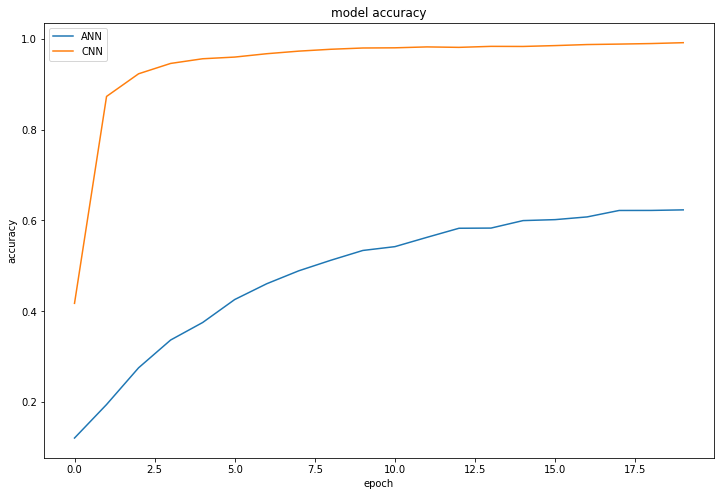

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_model_1.history['accuracy'], label = "ANN")
plt.plot(history_model_3.history['accuracy'], label = "CNN")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig("fig.png")

The accuracy on the test set is  97.7400004863739 %


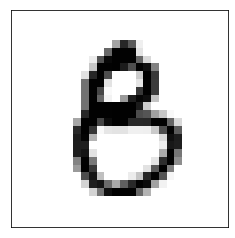

le chiffre reconnu est:  8
le chiffre à reconnaitre  est:  8


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(x_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(x_test[index].reshape((1,28,28,1)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))